# **Supervised Learning Algorithms - Linear Regression:** 

***What is UCI data repository?***

The UCI Machine Learning Repository is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

***Question:-***

Consider ***any*** dataset from UCI repository. 

Create a **Simple Linear Regression model(Univariant)** using the training data set. 

Predict the scores on the test data and output RMSE. 

Include appropriate code snippets to visualize the model. 

Interpret the result.

Write the Inference. 

In this Program the data set used is ***'Advertising.csv'***
It shows the money spent on **TV**, **Radio** and **Newspaper** Ads and the ***Sales*** Income generated. 

The Dataset is 200 rows and 5 columns. (TV, Radio,Newspaper and Sales). It has a Sl# column which is unnames. 

Refer this Link to execute on GOOGLE COLAB :- https://colab.research.google.com/drive/1ejI3OAYBsNq2i35Q4r1BlCF_KnAyzqvs?usp=sharing

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("Advertising.csv")
print(data.head())

   Unnamed: 0     TV  radio  newspaper  sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9
Index(['Unnamed: 0', 'TV', 'radio', 'newspaper', 'sales'], dtype='object')


In [3]:
#Dropping the first column which is 'Unnamed: 0'
# For permanent deleting of the column, use inplace=True in the drop method.
data.drop(['Unnamed: 0'], axis=1, inplace=True)
print(data.head())

      TV  radio  newspaper  sales
0  230.1   37.8       69.2   22.1
1   44.5   39.3       45.1   10.4
2   17.2   45.9       69.3    9.3
3  151.5   41.3       58.5   18.5
4  180.8   10.8       58.4   12.9


# **Plotting the raw data as. three scatter plots in a grid**

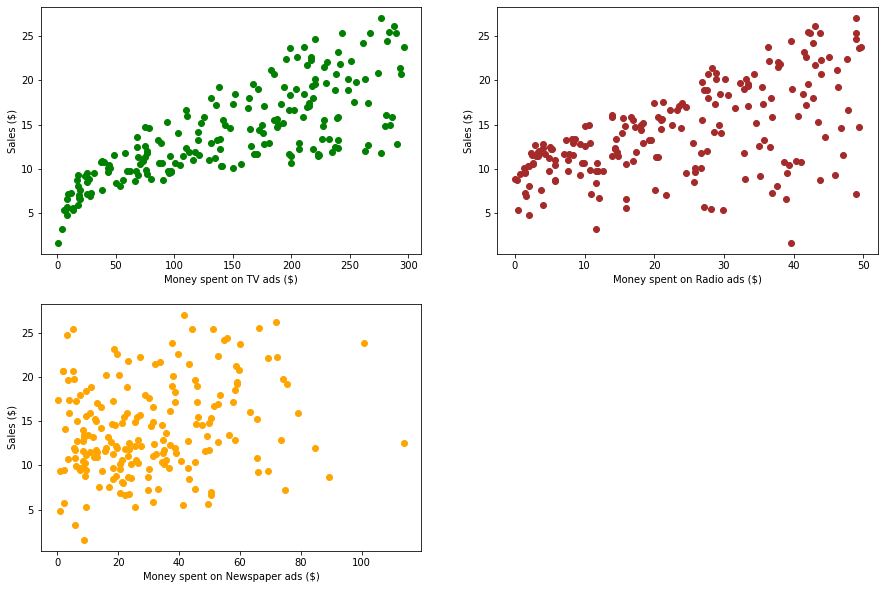

In [17]:
import matplotlib.pyplot as plt
# Note that the size is defined in inches, not pixels. This will result in a figure that's 15 in by 10 in in size:
myplt=plt.figure(figsize=(15,10))
# We've used the add_subplot() function, which accepts a series of numerical values. 
# The first number specifies how many rows you want to add to the figure, 
# The second number specifies how many columns you want to add, and 
# The third number specifies the number of the plot that you want to add.
ax1 = myplt.add_subplot(2,2,1)
ax1=plt.scatter(data['TV'], data['sales'], c='green')
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")

ax2 = myplt.add_subplot(2,2,2)
ax2=plt.scatter(data['radio'],data['sales'],c='brown')
plt.xlabel("Money spent on Radio ads ($)")
plt.ylabel("Sales ($)")

ax3 = myplt.add_subplot(2,2,3)
ax3=plt.scatter(data['newspaper'],data['sales'],c='orange')
plt.xlabel("Money spent on Newspaper ads ($)")
plt.ylabel("Sales ($)")
plt.show()


Importing packages from the sklearn library.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# **Applying Linear Regression. on TV Ads versus Sales**
**1)** Splitting the data. into train & test using sklearn library train_test_split

**2)** Finding the Best Fit Line for the data using sklearn inbuilt Linear Regression Functionn

**3)** Getting the mathematical equation with value of slope and intercept 

**4)** Plotting the Regression Line TV Ads versus Sales

**5)** Calculate the RMSE for the feature TV Ads Money versus Sales

Slope(m):  0.044861647003467786
Intercept(c):  7.339736332920051
The linear model of TV versus Sales is: Y = 0.044862X + 7.34
Root Mean Squared Error =  3.659598833848257


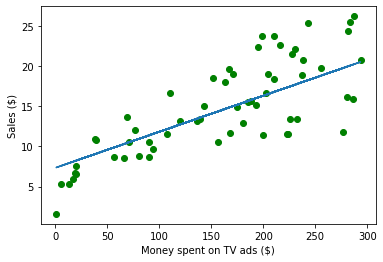

In [32]:
# https://www.youtube.com/watch?v=3wi0lJPfLUY
# reshape(-1,1) is necessory otherwise reg.fit() will lead to error
# https://stackoverflow.com/questions/18691084/what-does-1-mean-in-numpy-reshape
X = data['TV'].values.reshape(-1,1)
y = data['sales'].values.reshape(-1,1)

# Parameters of train_test_split()
# *arrays : sequence of indexables with same length / shape[0] Allowed inputs are lists, numpy arrays, scipy-sparse matrices or pandas dataframes.
# test_size : float, int or None, optional (default=0.25) If float, should be between 0.0 and 1.0 and represent the proportion of the dataset to include in the test split. If int, represents the absolute number of test samples. If None, the value is set to the complement of the train size. By default, the value is set to 0.25. The default will change in version 0.21. It will remain 0.25 only if train_size is unspecified, otherwise it will complement the specified train_size.

x_train, x_test, y_train, y_test = train_test_split(X,y,test_size = 0.3) #Using sklearn library 70% Train and 30% Test 
reg = LinearRegression() #Using sklearn library 
reg.fit(x_train, y_train) #Fit the best fit regression line 

print("Slope(m): ", reg.coef_[0][0])
print("Intercept(c): ", reg.intercept_[0])
print(f"The linear model of TV versus Sales is: Y = {reg.coef_[0][0]:.5}X + {reg.intercept_[0]:.3}")

predictions = reg.predict(x_test)
plt.scatter(x_test,y_test,c='green')
plt.plot(x_test,predictions)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")

# https://www.askpython.com/python/examples/rmse-root-mean-square-error
# Have a look on the second example of the above link
rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse) 

# **Applying Linear Regression. on radio Ads versus Sales**
**1)** Splitting the data. into train & test using sklearn library train_test_split

**2)** Finding the Best Fit Line for the data using sklearn inbuilt Linear Regression Function

**3)** Getting the mathematical equation with value of slope and intercept 

**4)** Plotting the Regression Line Radio Ads versus Sales

**5)** Calculate the RMSE for the feature Radio Ads Money versus Sales


Slope(m):  0.20297263352146597
Intercept(c):  9.24896534963002
The linear model for Radio versus Sales is: Y = 9.25 + 0.2X


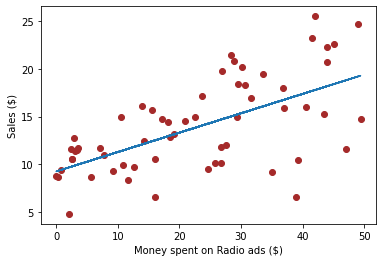

Root Mean Squared Error =  3.7728846041958515


In [6]:
X = data['radio'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the best fit regression line

print("Slope(m): ", reg.coef_[0][0])
print("Intercept(c): ", reg.intercept_[0])
print("The linear model for Radio versus Sales is: Y = {:.3} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))

predictions = reg.predict(x_test)
plt.scatter(x_test,y_test,c='brown')
plt.plot(x_test,predictions)
plt.xlabel("Money spent on Radio ads ($)")
plt.ylabel("Sales ($)")
plt.show()

rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

# **Applying Linear Regression. on Newspaper Ads versus Sales**
**1)** Splitting the data. into train & test using sklearn library train_test_split

**2)** Finding the Best Fit Line for the data using sklearn inbuilt Linear Regression Function

**3)** Getting the mathematical equation with value of slope and intercept 

**4)** Plotting the Regression Line Newspaper Ads versus Sales

**5)** Calculate the RMSE for the feature Newspaper Ads Money versus Sales

Slope(m):  0.04653239438685903
Intercept(c):  12.699849536594336
The linear model for Newspaper vs Sales is: Y = 12.7 + 0.047X


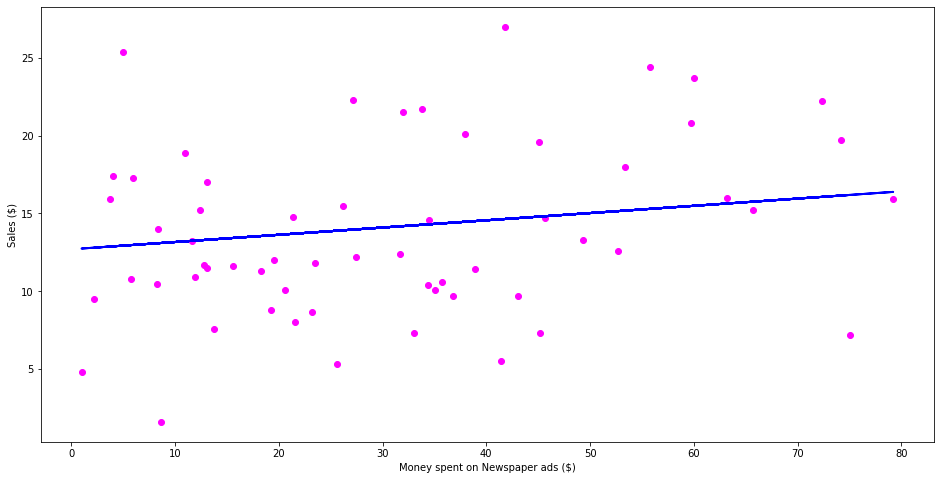

Root Mean Squared Error =  5.345197512997633


In [7]:
X = data['newspaper'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the best fit regression line

print("Slope(m): ", reg.coef_[0][0])
print("Intercept(c): ", reg.intercept_[0])
print("The linear model for Newspaper vs Sales is: Y = {:.3} + {:.2}X".format(reg.intercept_[0], reg.coef_[0][0]))

predictions = reg.predict(x_test)
plt.figure(figsize=(16, 8))
plt.scatter(x_test,y_test,c='magenta')
plt.plot(x_test,predictions,c='blue',linewidth=2)
plt.xlabel("Money spent on Newspaper ads ($)")
plt.ylabel("Sales ($)")
plt.show()

rmse = np.sqrt(mean_squared_error(y_test,predictions))
print("Root Mean Squared Error = ",rmse)

# **Plotting in a Grid Using Sub Plot function in Matplotlib**

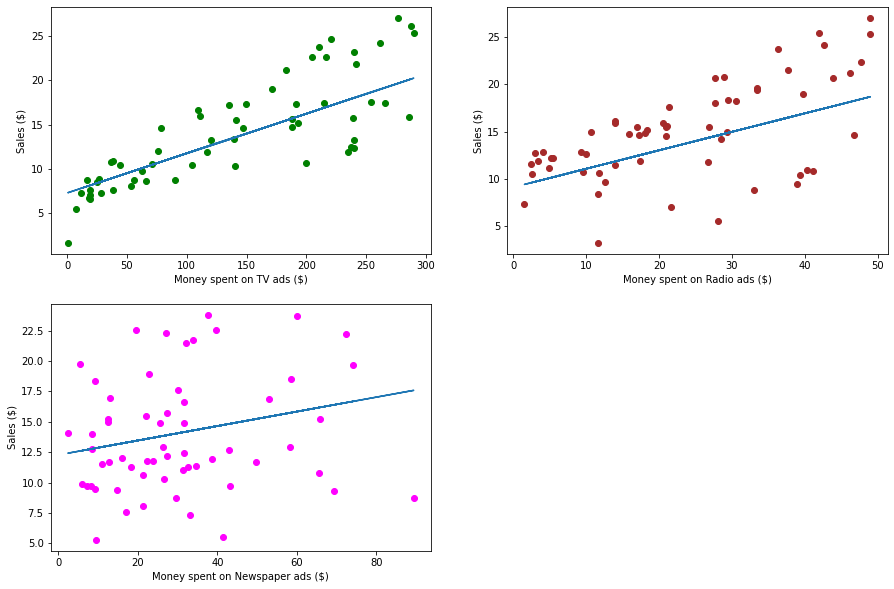

In [36]:
# This Cell box is just for plotting all the three plots in one figure
# TV vs SALES
X = data['TV'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the best fit regression line
predictions = reg.predict(x_test)
myplt = plt.figure(figsize=(15, 10))
ax1 = myplt.add_subplot(2, 2, 1)
ax1 = plt.scatter(x_test, y_test, c='green')
plt.plot(x_test, predictions)
plt.xlabel("Money spent on TV ads ($)")
plt.ylabel("Sales ($)")

# RADIO vs SALES
X = data['radio'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the best fit regression line
predictions = reg.predict(x_test)
ax2 = myplt.add_subplot(2, 2, 2)
ax2 = plt.scatter(x_test, y_test, c='brown')
plt.plot(x_test, predictions)
plt.xlabel("Money spent on Radio ads ($)")
plt.ylabel("Sales ($)")

# NEWSPAPER vs SALES
X = data['newspaper'].values.reshape(-1, 1)
y = data['sales'].values.reshape(-1, 1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
reg = LinearRegression()
reg.fit(x_train, y_train)  # Fit the best fit regression line
predictions = reg.predict(x_test)
ax3 = myplt.add_subplot(2, 2, 3)
ax3 = plt.scatter(x_test, y_test, c='magenta')
plt.plot(x_test, predictions)
plt.xlabel("Money spent on Newspaper ads ($)")
plt.ylabel("Sales ($)")
plt.show()
